In [3]:
import pandas as pd 
import seaborn as sns
logs = pd.read_csv('logs.csv')
user_data = pd.read_csv('user_data.csv')

In [4]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [3]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

In [53]:
#users_purchases = user_df.groupby('user_id', as_index=False) \
#    .agg({'brand_name': 'count'}) \
#    .rename(columns={'brand_name': 'purchases'}) \
#    .query('purchases >= 5')
users_purchases = logs.query('success == True') \
    .groupby('client', as_index=False)\
    .agg({'success' : 'count'})\
    .rename(columns={'success':'purchases'})
users_purchases = users_purchases.sort_values('purchases', ascending=False)

In [13]:
users_purchases.head()

,client,purchases
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41


In [15]:
max_count = max(users_purchases.purchases)
max_count

41

In [37]:
#rslt_df = dataframe[dataframe['Percentage'] > 80]
#df.loc[df['column_name'] == some_value]
top_users = users_purchases[users_purchases['purchases'] == 41]
top_users_list = top_users.client.tolist()
top_users_list.sort()
top_users_list


[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [35]:
top_users

,client,purchases
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


С какой платформы было совершено наибольшее количество успешных операций?

In [21]:
users_purchases_platform = logs.query('success == True') 
users_purchases_platform.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772


In [6]:
platform_unique = set(logs['platform'])

In [7]:
platform_unique

{'computer', 'phone', 'tablet'}

In [12]:
[users_purchases_platform.loc[users_purchases_platform.platform == platform].count() for platform in platform_unique]
#Число успешных операций для каждой из платформ выше

[client      180
 success     180
 platform    180
 time        180
 dtype: int64,
 client      2019
 success     2019
 platform    2019
 time        2019
 dtype: int64,
 client      1090
 success     1090
 platform    1090
 time        1090
 dtype: int64]

In [13]:
logs.loc[logs['success'] == True].platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

Какая платформа наиболее популярна среди премиумных клиентов?

In [15]:
premium_users = user_data.loc[user_data['premium'] == True]
premium_users

,client,premium,age
22,74867,True,27
23,49379,True,25
24,88203,True,35
29,32603,True,20
51,53182,True,24
...,...,...,...
2928,52373,True,36
2930,13688,True,66
2934,40643,True,22
2947,53774,True,50


In [16]:
premium_df = users_purchases_platform.merge(premium_users, on='client')
premium_df

,client,success,platform,time,premium,age
0,11983,True,phone,1585459511,True,68
1,99308,True,computer,1585409409,True,38
2,53978,True,computer,1585408637,True,46
3,85502,True,computer,1585405950,True,58
4,4318,True,phone,1585442895,True,45
...,...,...,...,...,...,...
298,20278,True,computer,1585456706,True,65
299,78455,True,phone,1585459854,True,23
300,57026,True,computer,1585438120,True,62
301,2864,True,phone,1585459818,True,41


In [17]:
premium_df.platform.value_counts()

phone       177
computer    108
tablet       18
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

In [5]:
df = logs.merge(user_data, on='client')
df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [28]:
df_premium = df.loc[df['premium'] == True]
df_non_premium = df.loc[df['premium'] == False]


C:\Users\puneg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\puneg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

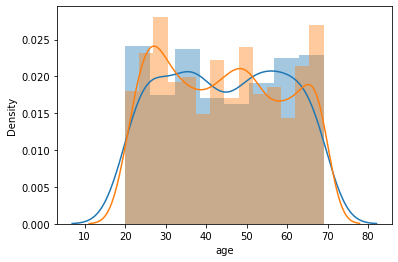

In [58]:
sns.distplot(df_premium.age)
sns.distplot(df_non_premium.age)


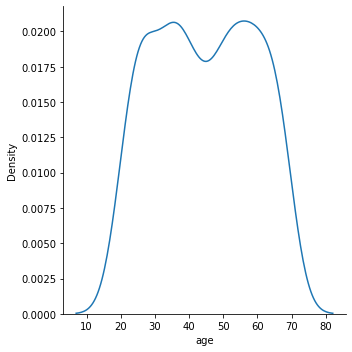

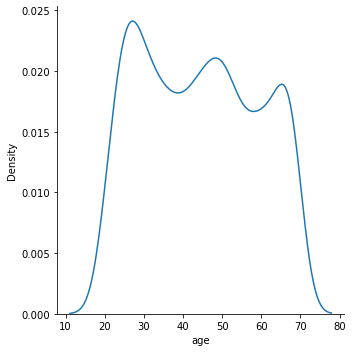

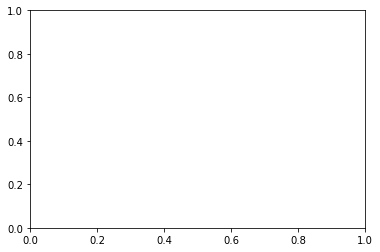

In [57]:
import matplotlib.pyplot as plt
fig = sns.displot(df_premium.age, kind="kde")
ax = sns.displot(df_non_premium.age, kind="kde")
fig, ax = plt.subplots()

In [11]:
#ages_count = df.groupby('age').age.value_counts().tolist()

In [41]:
#ages_count_premium = df.loc[df['premium'] == True].groupby('age').age.value_counts().tolist()
#ages_count_premium

In [40]:
#import numpy as np

#ages_count_premium = np.array(ages_count_premium)
#ages_count = np.array(ages_count)
#premium_ratio = ages_count_premium / ages_count
#premium_ratio

In [39]:
#sns.displot(list(set(df.age)))
#sns.displot(list(premium_ratio))

In [38]:
#sns.displot(x=list(set(df.age)),
#            hue='premium',
#            data=users_purchases_platform)

In [37]:
#ax = sns.displot(list(set(premium_ratio)))


In [36]:
#np.array(set(df.age))

In [35]:
#set(df.age)

Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

In [61]:
s_df = df.loc[df['success'] == True]
s_df.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


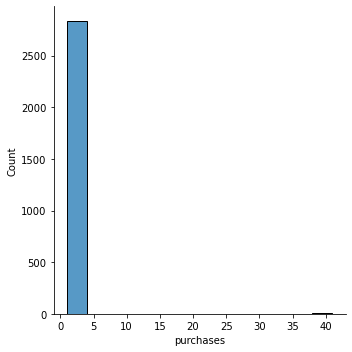

In [60]:
#users_purchases.head()
a = []
sns.displot(users_purchases.purchases)


Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

C:\Users\puneg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


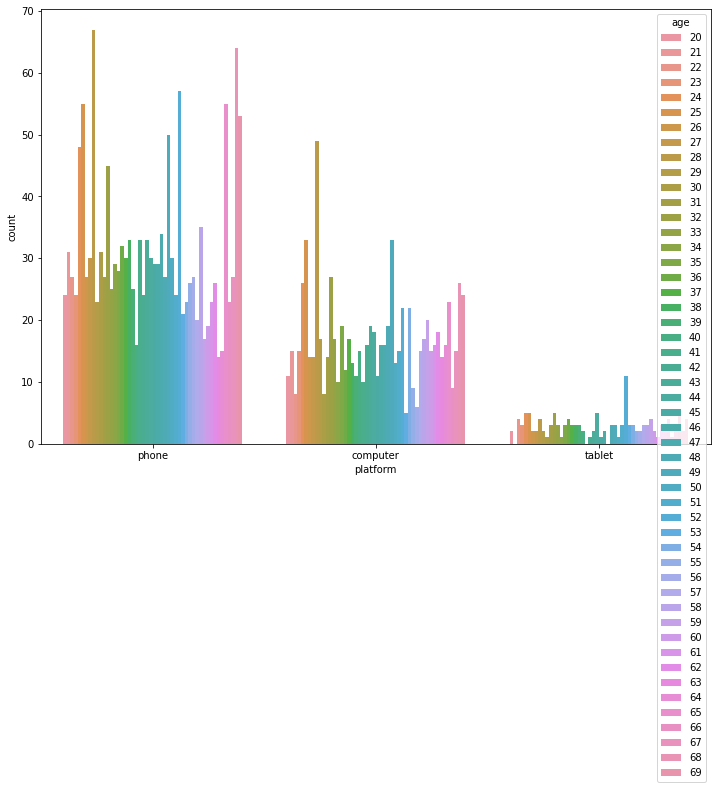

In [64]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(s_df.platform, hue=s_df.age)